In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
filepath = "/Users/lucakosina/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Hiwi/compPsy/ema_study/demographics/OCDOnlineProjects_DATA_2025-02-20_1413.csv"
data = pd.read_csv(filepath)    
data = data.reset_index(drop=True)    


In [3]:
#filepath to dataset_2025.csv
filepath2= '/Users/lucakosina/Library/Mobile Documents/com~apple~CloudDocs/Arbeit/Hiwi/compPsy/ema_study/demographics/Dataset_2025.csv'
ids = pd.read_csv(filepath2)

# drop data from data with ids["prolificID"] not in data["prolific_id_v2"] or data["prolific_id_v2_v2"]
data = data[data["prolific_id_v2"].isin(ids["prolificID"]) | data["prolific_id_v2_v2"].isin(ids["prolificID"])]

#### run the following block to remove IDs:

In [11]:
ids_taken_out = [17404, 17439, 17444, 17447, 17449, 17451, 17457, 17466, 17662, 17664, 17672, 17694, 17696, 17699, 17702, 17703, 17705, 17709, 17710, 17711, 17717, 17727, 19235, 19238, 19243, 19244, 19316, 19326, 19333, 19338, 19339, 19353, 19363, 19368, 19376, 19377, 19387, 19390, 17414, 17419, 17443, 19299, 19328]
prolific_ids = []



for i in ids["dataID"]:
    if i in ids_taken_out:
        prolific_ids.append(ids[ids["dataID"] == i]["prolificID"].values[0])

print(prolific_ids)

# remove rows with specific prolificIDs 
data = data[~data["prolific_id_v2_v2"].isin(prolific_ids)]
data = data.reset_index(drop=True)   

data = data[~data["prolific_id_v2"].isin(prolific_ids)]
data = data.reset_index(drop=True)   

['5d55919845cfe20019b1c7d7', '6693ad02e4dd0cfa3a193d75', '5deaf8d461513d224cd809f9', '665c7ece76b5f49e54a789b3', '59836c8b06cd1f0001f8e111', '60e0dc6be0772b7dfdad9b2c', '5fa0803077c8550dcb24237d', '6701ad9bbdc4d73b21702d64', '5f102a09b48e422804eff318', '5ab912d7e1546900019b7674', '63d3ff7455fe68b811ef6b57', '6637c44cb54ab265ecb86d3d', '66990d332513e41439621e21', '665bf5d1d0a8c603ab8b5f9a', '66c9f7305f8a64d04cb5344c', '672dd8c8168737a89c25e74f', '63bc6b6c7a3d5b328d28247f', '586fbaa37e187d0001cb36d5', '673c5dcf6f78c6392cc62496', '6659a4d0fe7536ccbcf9c133', '6658bd4310ee952480a920ba', '609bac863103cd810a60f3a8', '66c0c15f49b458efaaadc3eb', '59b5b916834a170001d60a28', '5e2330f7d6dc3f000b6612da', '67311b436baff30462230061', '6716a1fae7ca6e212ef61ed7', '661188f9f088ba0f673a6935', '5a94a557f6dfdd0001ea4d91', '5e1e1fe3c3409905e7565c83', '66d868d3d2165f7a9bd9a9ee', '66df649422e557253882cee8', '66ac1f27dec4cf4a596840bd', '672e22142aab65aaeec4135f', '59864648fd8cca00015cbb09', '5f8b3e21f863882502

In [12]:
print(data["prolific_id_v2"].unique())
print(data["prolific_id_v2_v2"].unique())

all_prolific_ids = data["prolific_id_v2"].unique()
all_prolific_ids = np.concatenate((all_prolific_ids, data["prolific_id_v2_v2"].unique()))


all_ids = []

# create a list of dataIds in ids that correspond to the prolificIDs in data
for i in all_prolific_ids:
    if i in ids["prolificID"].values:
        all_ids.append(ids[ids["prolificID"] == i]["dataID"].values[0])
all_ids = np.array(all_ids)


print(all_ids)
print(len(all_ids))


[nan]
['6659b0c46a1675f2d40e2586' '66a8e5cfc411f4b77b49dff3'
 '6658b97a550b0dbb23385b16' '6674a611c78207e9009eaadd'
 '59edca95ac0af70001b36f9c' '671c35abec458c9e4d98194a'
 '673f2fefcdc231c7708da123' '5f1ca37bcecc12026413cb96'
 '6666251b91a637999fba3144' '5bbdb4030cb04c00015071d1'
 '60bb1555e03a5bc45b9458be' '5fa92f3172de7e02d5d77656'
 '5af173d0151c06000101e090' '63ee0d0ff9577e91114acc53'
 '5e3a0494852c30225cf95713' '6317691462a2f2900d1856a8'
 '6111309539bbf74914182dda' '62da92a05e6ca94d1d778e03'
 '611cf78346c5e728a66f1ebe' '60465205820f850f2dc6a810'
 '671a590d73cd069bd72e7079' '642e967a90557425ce089ef5'
 '5b1d8c8988ee7400012b2730' '66ca1eb9838ef435024c6b1b'
 '5a2ba3972a1bed0001f352a6' '666272fcedf2850ab9824b47'
 '66735eb3b7a2b7865029fd0e' '6658b30f356392e45b47ca35'
 '6667015e358c1fe41b8a3d7f' '5c755c061e58be00156df988'
 '629f43da9f4c51d00f73b266' '5e3c186a6cc683000db4e171'
 '615a0198a1a2d449a781b8a5' '60d62b5651b24897058ec1b2'
 '673080deb1f3e466cda021b1' '600f46f6c513db11698a960d'
 '66

In [13]:
gender = pd.concat([data["gender"], data["gender_v2"]])
age = pd.concat([data["age"], data["age_v2"]])
education = pd.concat([data["education"], data["education_v2"]]) 
ethnicity = pd.concat([data["ethnicity"], data["ethnicity_v2"]])


In [14]:
mean_age = age.mean()
std_age = age.std()

In [15]:
gender_categories = {1: "non-binary", 2: "female", 3: "male", 4: "other"}
education_categories = {0: "Unknown", 1: "No formal schooling", 2: "Primary School", 3: "Secondary School", 4: "College", 5: "Undergraduate or equivalent", 6: "Master´s or equivalent", 7: "Doctorate/PhD or equivalent"}
ethnicity_categories = {0: "Unknown", 1: "Asian", 2: "Arab", 3: "Black/African/Caribbean", 4: "Latino/Hispanic", 5: "White/Caucasian", 6: "Other"}    

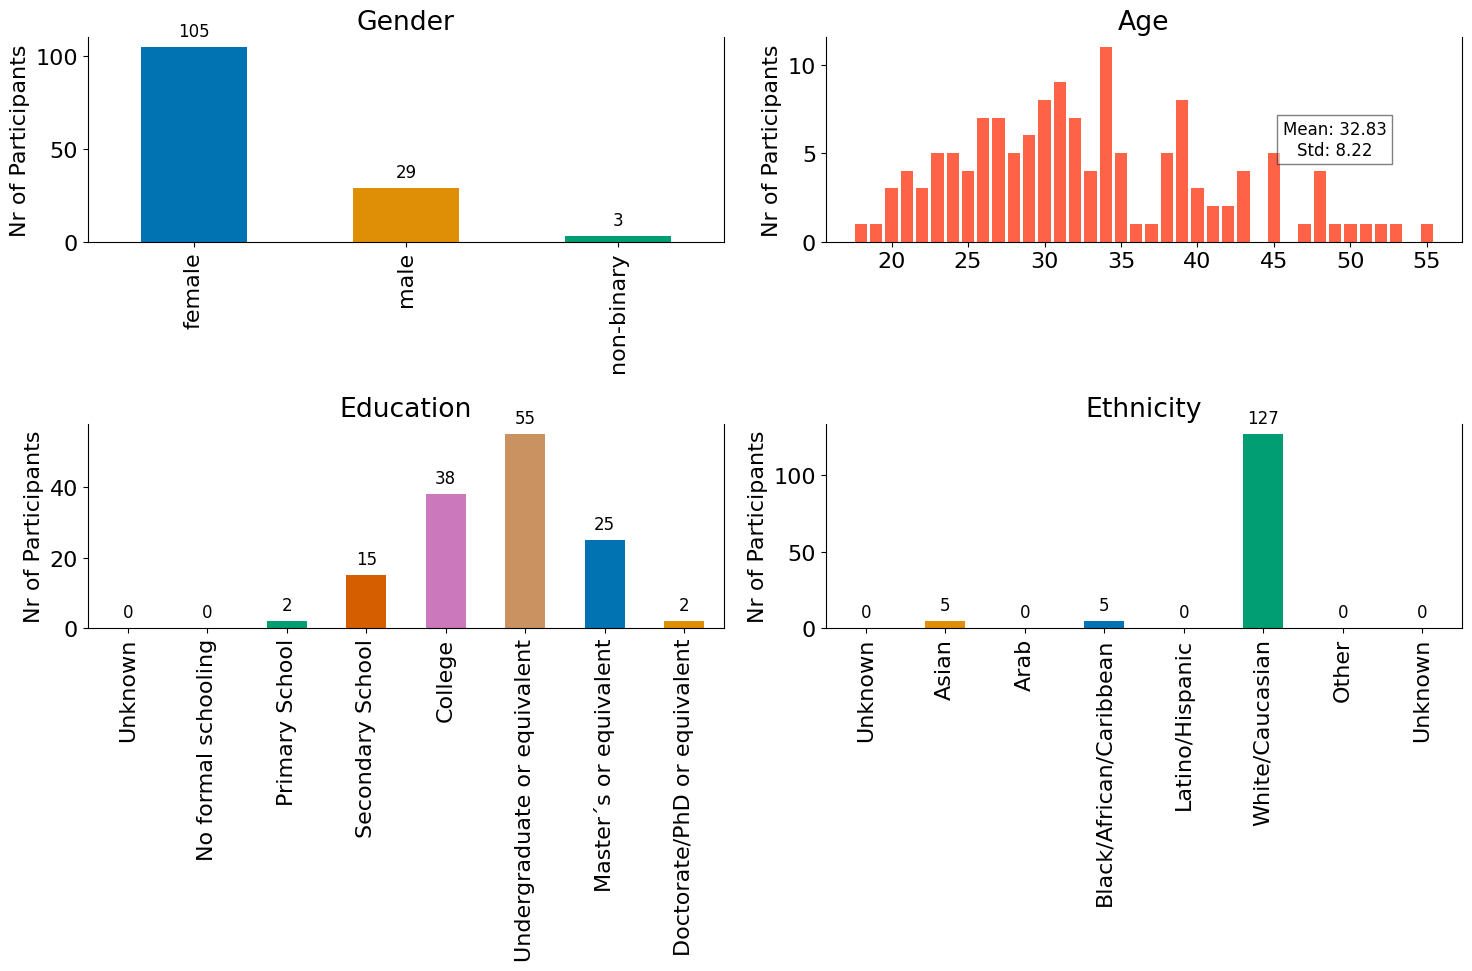

In [16]:
# plot the count for each unique value in each category

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Calculate standard deviations for each category
gender_std = gender.value_counts().std()
education_std = education.value_counts().std()
ethnicity_std = ethnicity.value_counts().std()


gender_colors = sns.color_palette("colorblind", len(gender.value_counts()))
education_counts = education.value_counts()
education_colors = sns.color_palette("colorblind", len(education_counts))
ethnicity_counts = ethnicity.value_counts()
ethnicity_colors = sns.color_palette("colorblind", len(ethnicity_counts))
    
# Plot gender
gender.value_counts().plot(kind='bar', ax=axes[0, 0], title='Gender', color=gender_colors)
axes[0, 0].set_xticklabels([gender_categories.get(x, 'Unknown') for x in gender.value_counts().index])
# add counts on top of bars
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                        textcoords='offset points')

# Plot age
axes[0, 1].bar(age.value_counts().index, age.value_counts(), color='tomato')  
axes[0, 1].set_title('Age') 
# add mean age and std age to the plot in a text box
axes[0, 1].text(0.8, 0.5, f'Mean: {mean_age:.2f}\nStd: {std_age:.2f}', 
             horizontalalignment='center', verticalalignment='center', 
             transform=axes[0, 1].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))  

# Plot education
#education.value_counts().plot(kind='bar', ax=axes[1, 0], title='Education', color='tomato')
education_counts = education.value_counts()
education_counts = education_counts.reindex(range(8), fill_value=0)
education_counts.plot(kind='bar', ax=axes[1, 0], title='Education', color=education_colors)
axes[1, 0].set_xticklabels([education_categories.get(x, 'Unknown') for x in education_counts.index])
for p in axes[1, 0].patches:
    axes[1, 0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                        textcoords='offset points')

# Plot ethnicity
#ethnicity.value_counts().plot(kind='bar', ax=axes[1, 1], title='Ethnicity', color='tomato')
ethnicity_counts = ethnicity.value_counts()
ethnicity_counts = ethnicity_counts.reindex(range(8), fill_value=0)
ethnicity_counts.plot(kind='bar', ax=axes[1, 1], title='Ethnicity', color=ethnicity_colors)
axes[1, 1].set_xticklabels([ethnicity_categories.get(x, 'Unknown') for x in ethnicity_counts.index])
for p in axes[1, 1].patches:
    axes[1, 1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                        textcoords='offset points')

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.grid(False)        
    ax.set_ylabel('Nr of Participants')


plt.rcParams.update({'font.size': 16})

plt.tight_layout()
plt.show()

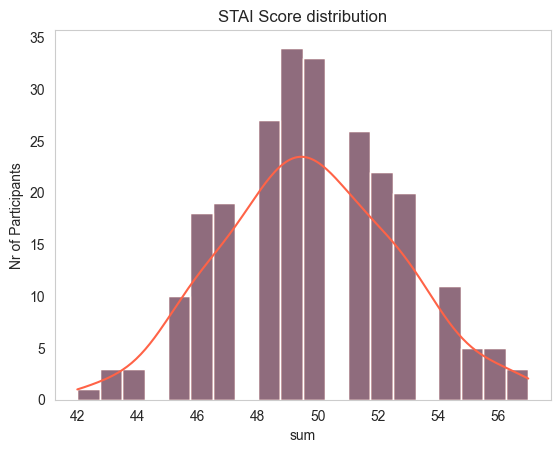

In [ ]:

# search all columns for the word "stai" and add all data in these columns into a new dataframe
stai = pd.DataFrame()       
for column in data.columns:
    if "stai_3" in column or "stai_4" in column or "stai_6" in column or "stai_7" in column or "stai_9" in column or "stai_12" in column or "stai_13" in column or "stai_14" in column or "stai_17" in column or "stai_18" in column or "stai_22" in column or "stai_23" in column or "stai_24" in column or "stai_25" in column or "stai_28" in column or "stai_29" in column or "stai_31" in column or "stai_32" in column or "stai_34" in column or "stai_35" in column or "stai_37" in column or "stai_38" in column or "stai_40" in column:
        # add column to stai dataframe
        stai[column] = data[column]
    elif "stai_1" in column or "stai_2" in column or "stai_5" in column or "stai_8" in column or "stai_10" in column or "stai_11" in column or "stai_15" in column or "stai_16" in column or "stai_19" in column or "stai_20" in column or "stai_21" in column or "stai_26" in column or "stai_27" in column or "stai_30" in column or "stai_33" in column or "stai_36" in column or "stai_39" in column:
        stai[column] = np.abs(5 - data[column])

# for each row add all stai values togehter and add the sum to a new column
stai["sum"] = stai.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
stai = stai[stai["sum"] != 0]
stai["sum"].plot(kind='hist', bins=20)
sns.histplot(stai["sum"], bins=20, kde=True, color='tomato')
plt.grid(False)
plt.title('STAI Score distribution')
plt.ylabel('Nr of Participants')
plt.show()


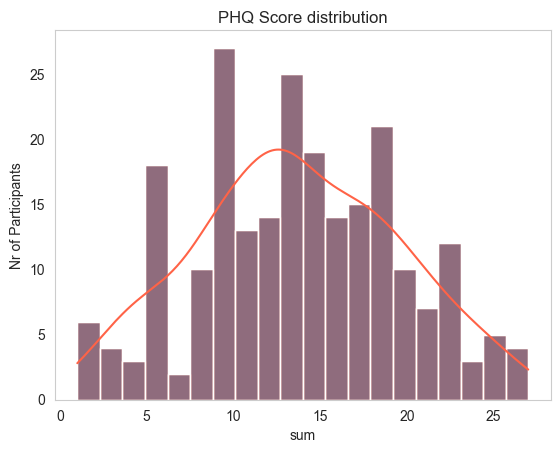

In [144]:
# repeat for PHQ
phq = pd.DataFrame()       
for column in data.columns:
    if "phq" in column:
        # add column to stai dataframe
        phq[column] = data[column]

phq["sum"] = phq.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
phq = phq[phq["sum"] != 0]
phq["sum"].plot(kind='hist', bins=20)
sns.histplot(phq["sum"], bins=20, kde=True, color='tomato')
plt.title('PHQ Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()

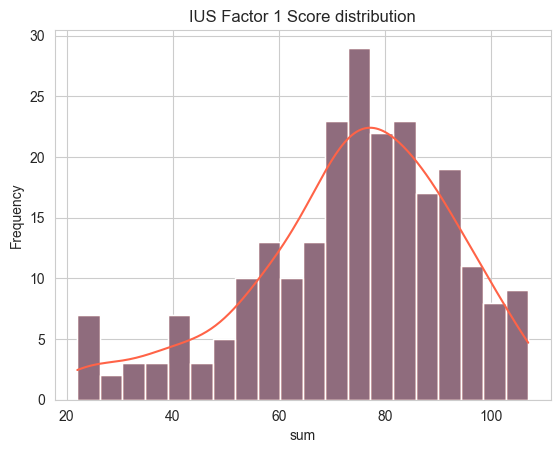

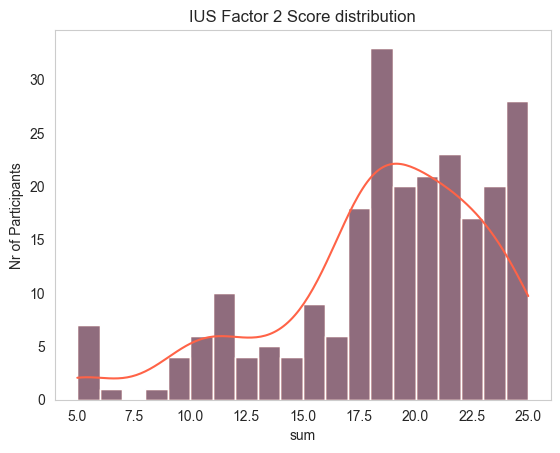

In [143]:
# repeat for IUS
ius1 = pd.DataFrame() 
ius2 = pd.DataFrame()      
for column in data.columns:
    if "ius_1" in column or "ius_2" in column or "ius_3" in column or "ius_9" in column or "ius_12" in column or "ius_13" in column or "ius_14" in column or "ius_15" in column or "ius_16" in column or "ius_17" in column or "ius_20" in column or "ius_22" in column or "ius_23" in column or "ius_24" in column or "ius_25" in column:
        # add column to stai dataframe
        ius1[column] = data[column]
    elif "ius_4" in column or "ius_5" in column or "ius_6" in column or "ius_7" in column or "ius_8" in column or "ius_10" in column or "ius_11" in column or "ius_18" in column or "ius_19" in column or "ius_21" in column or "ius_26" in column or "ius_27" in column:
        ius2[column] = data[column]

ius1["sum"] = ius1.sum(axis=1)
ius2["sum"] = ius2.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
ius1 = ius1[ius1["sum"] != 0]
ius1["sum"].plot(kind='hist', bins=20)
sns.histplot(ius1["sum"], bins=20, kde=True, color='tomato')
plt.title('IUS Factor 1 Score distribution')
plt.show()

ius2 = ius2[ius2["sum"] != 0]
ius2["sum"].plot(kind='hist', bins=20)
sns.histplot(ius2["sum"], bins=20, kde=True, color='tomato')
plt.title('IUS Factor 2 Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()



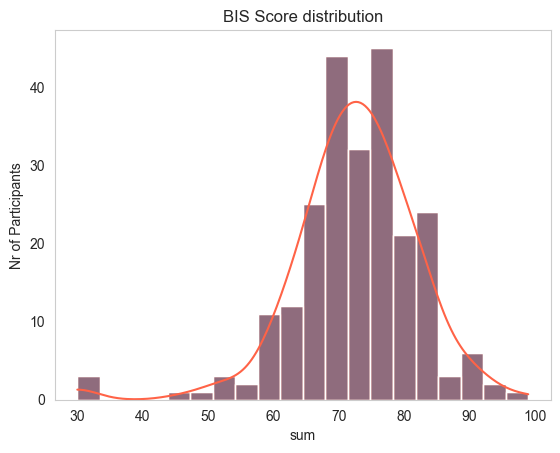

In [142]:
# repeat for BIS
bis = pd.DataFrame()       
for column in data.columns:
    if "bis" in column:
        # add column to stai dataframe
        bis[column] = data[column]

bis["sum"] = bis.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
bis = bis[bis["sum"] != 0]
bis["sum"].plot(kind='hist', bins=20)
sns.histplot(bis["sum"], bins=20, kde=True, color='tomato')
plt.title('BIS Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()

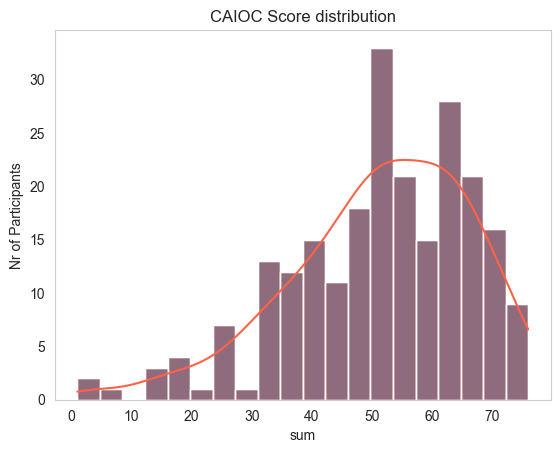

In [141]:
# repeat for CAIOC
caioc = pd.DataFrame()       
for column in data.columns:
    if "caioc" in column:
        # add column to stai dataframe
        caioc[column] = data[column]

caioc["sum"] = caioc.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
caioc = caioc[caioc["sum"] != 0]
caioc["sum"].plot(kind='hist', bins=20)
sns.histplot(caioc["sum"], bins=20, kde=True, color='tomato')
plt.title('CAIOC Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()

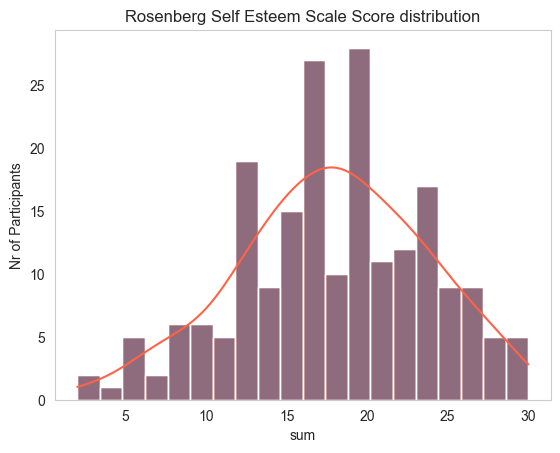

In [140]:
# repeat for Rosenberg
rosenberg = pd.DataFrame()       
for column in data.columns:
    if "rosenberg_3" in column or "rosenberg_5" in column or "rosenberg_8" in column or "rosenberg_9" in column or "rosenberg_10" in column:
        # add column to stai dataframe
        rosenberg[column] = np.abs(data[column] - 3)
    elif "rosenberg_1" in column or "rosenberg_2" in column or "rosenberg_4" in column or "rosenberg_6" in column or "rosenberg_7" in column: 
        rosenberg[column] = data[column]

rosenberg["sum"] = rosenberg.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
rosenberg = rosenberg[rosenberg["sum"] != 0]
rosenberg["sum"].plot(kind='hist', bins=20)
sns.histplot(rosenberg["sum"], bins=20, kde=True, color='tomato')
plt.title('Rosenberg Self Esteem Scale Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()



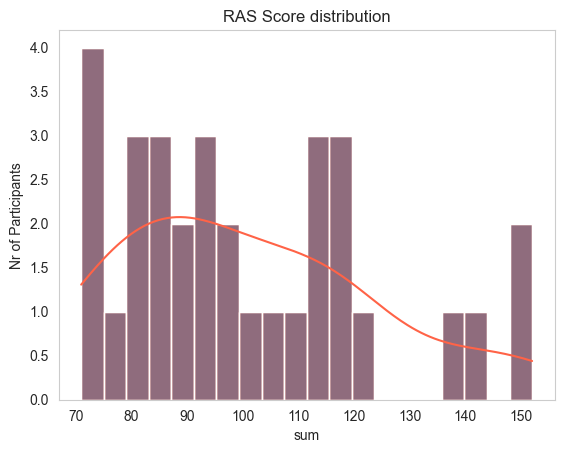

In [139]:
# repeat for RAS
ras = pd.DataFrame()       
for column in data.columns:
    if "ras" in column:
        # add column to stai dataframe
        ras[column] = data[column]

ras["sum"] = ras.sum(axis=1)

# plot distribution of sum after removing 0 values from sum
ras = ras[ras["sum"] != 0]
ras["sum"].plot(kind='hist', bins=20)
sns.histplot(ras["sum"], bins=20, kde=True, color='tomato')
plt.title('RAS Score distribution')
plt.grid(False)
plt.ylabel('Nr of Participants')
plt.show()